Filtering annotated variants to extract small variants for ML

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
from tqdm import tqdm 
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
os.chdir( '/data/project/worthey_lab/projects/experimental_pipelines/tarun/DITTO/data/external/')

In [2]:
# Function to open and load config file for filtering columns and rows
def get_col_configs(config_f):
    with open(config_f) as fh:
        config_dict = yaml.safe_load(fh)

    # print(config_dict)
    return config_dict


In [ ]:
# Load the config file as dictionary
config_f = "../../configs/col_config.yaml"
config_dict = get_col_configs(config_f)

In [17]:
config_dict["raw_cols"]

['transcript',
 'gene',
 'consequence',
 'protein_hgvs',
 'cdna_hgvs',
 'chrom',
 'pos',
 'ref_base',
 'alt_base',
 'coding',
 'aloft.affect',
 'aloft.tolerant',
 'aloft.recessive',
 'aloft.dominant',
 'aloft.pred',
 'aloft.conf',
 'cadd_exome.phred',
 'cgd.inheritance',
 'chasmplus.score',
 'chasmplus.pval',
 'civic.clinical_a_score',
 'cosmic.variant_count',
 'cosmic_gene.occurrences',
 'cscape.score',
 'cgc.class',
 'cgc.inheritance',
 'cancer_genome_interpreter.resistant',
 'cancer_genome_interpreter.responsive',
 'cancer_genome_interpreter.other',
 'ccre_screen._group',
 'ccre_screen.bound',
 'clingen.disease',
 'clingen.classification',
 'clinpred.score',
 'clinvar.sig',
 'clinvar.id',
 'clinvar.rev_stat',
 'clinvar.sig_conf',
 'dann.score',
 'dann_coding.dann_coding_score',
 'dgi.interaction',
 'dgi.score',
 'ensembl_regulatory_build.region',
 'ess_gene.indispensability_score',
 'exac_gene.exac_pli',
 'exac_gene.exac_pnull',
 'exac_gene.exac_del_score',
 'exac_gene.exac_dup_scor

In [6]:
print('Loading data...')
df = pd.read_csv("../interim/clinvar_parsed.csv.gz", usecols=config_dict["raw_cols"], low_memory=False)
print('Data Loaded !....')


Loading data...
Data Loaded !....


In [7]:
df.columns.to_list()

['transcript',
 'gene',
 'consequence',
 'protein_hgvs',
 'cdna_hgvs',
 'chrom',
 'pos',
 'ref_base',
 'alt_base',
 'coding',
 'aloft.affect',
 'aloft.tolerant',
 'aloft.recessive',
 'aloft.dominant',
 'aloft.pred',
 'aloft.conf',
 'cadd_exome.phred',
 'cgd.inheritance',
 'chasmplus.score',
 'chasmplus.pval',
 'civic.clinical_a_score',
 'cosmic.variant_count',
 'cosmic_gene.occurrences',
 'cscape.score',
 'cgc.class',
 'cgc.inheritance',
 'cancer_genome_interpreter.resistant',
 'cancer_genome_interpreter.responsive',
 'cancer_genome_interpreter.other',
 'ccre_screen._group',
 'ccre_screen.bound',
 'clingen.disease',
 'clingen.classification',
 'clinpred.score',
 'clinvar.sig',
 'clinvar.id',
 'clinvar.rev_stat',
 'clinvar.sig_conf',
 'dann.score',
 'dann_coding.dann_coding_score',
 'dgi.interaction',
 'dgi.score',
 'ensembl_regulatory_build.region',
 'ess_gene.indispensability_score',
 'exac_gene.exac_pli',
 'exac_gene.exac_pnull',
 'exac_gene.exac_del_score',
 'exac_gene.exac_dup_scor

In [18]:
df = df[config_dict["raw_cols"]]

In [113]:
df.shape

(10460446, 127)

In [14]:
#df = df.replace(['.','-'], np.nan)

In [23]:
df['so'] = df['consequence']

/scratch/local/ipykernel_217716/2770713044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['so'] = df['consequence']


In [112]:
df.dtypes

transcript                                  object
gene                                        object
consequence                                 object
protein_hgvs                                object
cdna_hgvs                                   object
chrom                                       object
pos                                          int64
ref_base                                    object
alt_base                                    object
coding                                      object
aloft.affect                                object
aloft.tolerant                             float64
aloft.recessive                            float64
aloft.dominant                             float64
aloft.pred                                  object
aloft.conf                                  object
cadd_exome.phred                           float64
cgd.inheritance                             object
chasmplus.score                            float64
chasmplus.pval                 

In [21]:
#df['fathmm.fathmm_score'].unique()
#df["fathmm.fathmm_score"] = df["fathmm.fathmm_score"].replace(['.'], np.nan)
#df["fathmm.fathmm_score"] = pd.to_numeric(df["fathmm.fathmm_score"])

In [26]:
original = df

In [111]:
df = original

In [114]:
#Drop variants with leass than 30% of data along with duplicates. Also delete columns with all null values.
print('Dropping empty columns and rows along with duplicate rows...')
#df.dropna(axis=1, thresh=(df.shape[0]*0.15), inplace=True)  #thresh=(df.shape[0]/4)
df.dropna(axis=0, thresh=(df.shape[1]*0.3), inplace=True)  #thresh=(df.shape[1]*0.3),   how='all',
df.drop_duplicates()
df.dropna(axis=1, how='all', inplace=True)  #thresh=(df.shape[0]/4)
print('\nData shape =', df.shape)
print('\nclinvar_CLNSIG:\n', df['clinvar.sig'].value_counts())
print('\nclinvar_review:\n', df['clinvar.rev_stat'].value_counts())
print('\nclinvar_confidence:\n', df['clinvar.sig_conf'].value_counts())
print('\nclingen_classification:\n', df['clingen.classification'].value_counts())

Dropping empty columns and rows along with duplicate rows...

Data shape = (10460446, 127)

clinvar_CLNSIG:
 Uncertain significance                                                  3650761
Likely benign                                                           1877112
Benign                                                                   680494
Pathogenic                                                               550284
Conflicting interpretations of pathogenicity                             477279
Likely pathogenic                                                        330335
Benign/Likely benign                                                     180299
Pathogenic/Likely pathogenic                                              88090
not provided                                                              78719
drug response                                                             10229
other                                                                      5604
risk factor

In [45]:
print(len(df[df['clinvar.sig_conf'].str.contains('athogen')==True][['clinvar.sig','clinvar.sig_conf']]))
df[df['clinvar.sig_conf'].str.contains('athogen')==True][['clinvar.sig','clinvar.sig_conf']].tail(10)

82109


,clinvar.sig,clinvar.sig_conf
12920252,Conflicting interpretations of pathogenicity,Likely pathogenic(1)|Uncertain significance(1)
12920253,Conflicting interpretations of pathogenicity,Likely pathogenic(1)|Uncertain significance(1)
12920300,Conflicting interpretations of pathogenicity,Pathogenic(1)|Likely pathogenic(3)|Likely beni...
12920301,Conflicting interpretations of pathogenicity,Pathogenic(1)|Likely pathogenic(3)|Likely beni...
12920350,Conflicting interpretations of pathogenicity,Likely pathogenic(1)|Uncertain significance(1)
12920351,Conflicting interpretations of pathogenicity,Likely pathogenic(1)|Uncertain significance(1)
12920360,Conflicting interpretations of pathogenicity,Likely pathogenic(1)|Uncertain significance(1)
12920744,Conflicting interpretations of pathogenicity,Pathogenic(1)|Uncertain significance(1)
12920745,Conflicting interpretations of pathogenicity,Pathogenic(1)|Uncertain significance(1)
12920746,Conflicting interpretations of pathogenicity,Pathogenic(1)|Uncertain significance(1)


In [29]:
# Check if there are any categorical columns
num_cols = df._get_numeric_data().columns

list(set(df.columns) - set(num_cols))

['chrom',
 'omim.omim_id',
 'aloft.pred',
 'gtex.gtex_tissue',
 'ccre_screen._group',
 'protein_hgvs',
 'sift.confidence',
 'clinvar.sig_conf',
 'aloft.affect',
 'clingen.disease',
 'prec.stat',
 'clinvar.sig',
 'exac_gene.exac_cnv_flag',
 'ensembl_regulatory_build.region',
 'uniprot.acc',
 'dgi.interaction',
 'mutationtaster.model',
 'ccre_screen.bound',
 'dbsnp.rsid',
 'coding',
 'cgd.inheritance',
 'gene',
 'clinvar.rev_stat',
 'ref_base',
 'consequence',
 'aloft.conf',
 'clingen.classification',
 'transcript',
 'so',
 'cdna_hgvs',
 'repeat.repeatclass',
 'alt_base',
 'mutationtaster.prediction',
 'genehancer.feature_name',
 'cgc.inheritance',
 'cgc.class']

In [30]:
len(list(set(df.columns) - set(num_cols)))

36

In [31]:
df[list(set(df.columns) - set(num_cols))].head()

,chrom,omim.omim_id,aloft.pred,gtex.gtex_tissue,ccre_screen._group,protein_hgvs,sift.confidence,clinvar.sig_conf,aloft.affect,clingen.disease,...,clingen.classification,transcript,so,cdna_hgvs,repeat.repeatclass,alt_base,mutationtaster.prediction,genehancer.feature_name,cgc.inheritance,cgc.class
0,chr1,NaN,NaN,NaN,NaN,p.Glu15Gly,High,NaN,NaN,NaN,...,NaN,ENST00000335137,missense_variant,c.44A>G,NaN,G,Polymorphism,NaN,NaN,NaN
1,chr1,NaN,NaN,NaN,NaN,p.Glu36Gly,NaN,NaN,NaN,NaN,...,NaN,ENST00000641515,missense_variant,c.107A>G,NaN,G,Polymorphism,NaN,NaN,NaN
2,chr1,NaN,NaN,NaN,NaN,p.Pro164Arg,High,NaN,NaN,NaN,...,NaN,ENST00000335137,missense_variant,c.491C>G,NaN,G,Polymorphism,NaN,NaN,NaN
3,chr1,NaN,NaN,NaN,NaN,p.Pro185Arg,NaN,NaN,NaN,NaN,...,NaN,ENST00000641515,missense_variant,c.554C>G,NaN,G,Polymorphism,NaN,NaN,NaN
4,chr1,NaN,NaN,NaN,NaN,p.Val198Met,High,NaN,NaN,NaN,...,NaN,ENST00000335137,missense_variant,c.592G>A,NaN,A,Polymorphism,NaN,NaN,NaN


In [46]:
df['exac_gene.exac_cnv_flag'].value_counts()

N    8077422
Y     766611
Name: exac_gene.exac_cnv_flag, dtype: int64

### Get data for training

In [115]:
#Filter variants for clinvar_review
#df= df.loc[df['clinvar_review'].isin(config_dict['CLNREVSTAT'])]
df= df.loc[df['clinvar.sig'].isin(config_dict['train_ClinicalSignificance'])]
print('\nData shape =', df.shape)
print('\nclinvar_CLNSIG:\n', df['clinvar.sig'].value_counts())
print('\nclinvar_review:\n', df['clinvar.rev_stat'].value_counts())


Data shape = (7834654, 127)

clinvar_CLNSIG:
 Uncertain significance                          3650761
Likely benign                                   1877112
Benign                                           680494
Pathogenic                                       550284
Conflicting interpretations of pathogenicity     477279
Likely pathogenic                                330335
Benign/Likely benign                             180299
Pathogenic/Likely pathogenic                      88090
Name: clinvar.sig, dtype: int64

clinvar_review:
 criteria provided, single submitter                     5499016
criteria provided, multiple submitters, no conflicts    1536341
criteria provided, conflicting interpretations           476077
no assertion criteria provided                           232055
reviewed by expert panel                                  91067
practice guideline                                           98
Name: clinvar.rev_stat, dtype: int64


In [20]:
#df1 = df

In [21]:
#Filter variants for clinvar_review
#df= df.loc[df['clinvar.rev_stat'].isin(config_dict['CLNREVSTAT'])]
#df= df.loc[df['clinvar.sig'].isin(config_dict['ClinicalSignificance'])]
#print('\nData shape (nsSNV) =', df.shape)
#print('\nclinvar_CLNSIG:\n', df['clinvar.sig'].value_counts())
#print('\nclinvar_review:\n', df['clinvar.rev_stat'].value_counts())

In [48]:
print(len(df[df['clinvar.sig_conf'].str.contains('athogen')==True][['clinvar.sig','clinvar.sig_conf']]))

81874


In [116]:
df['class'] = ''

/scratch/local/ipykernel_217716/1926842968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = ''


In [117]:
conditions = [
    (df['clinvar.sig'] == 'Conflicting interpretations of pathogenicity') & df['clinvar.sig_conf'].str.contains('athogen'),
    (df['clinvar.sig'] == 'Likely benign') | (df['clinvar.sig'] == 'Benign') | (df['clinvar.sig'] == 'Benign/Likely benign'),
    (df['clinvar.sig'] == 'Likely pathogenic') | (df['clinvar.sig'] == 'Pathogenic') | (df['clinvar.sig'] == 'Pathogenic/Likely pathogenic'),
    
]

values = ['high_impact', 'low_impact', 'high_impact']

df['class'] = np.select(conditions, values)
df= df.loc[df['class'].isin(['low_impact', 'high_impact'])]
print('\nData shape =', df.shape)
print('\nClasses:\n', df['class'].value_counts())

/scratch/local/ipykernel_217716/1212453335.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = np.select(conditions, values)



Data shape = (3788488, 128)

Classes:
 low_impact     2737905
high_impact    1050583
Name: class, dtype: int64


In [119]:
df['class'].unique()

array(['low_impact', 'high_impact'], dtype=object)

In [52]:
pd.pivot_table(df, values='consequence', index='so', columns='class',
                          aggfunc='count')

class,high_impact,low_impact
so,,
2kb_downstream_variant,13744.0,46182.0
"2kb_downstream_variant,2kb_upstream_variant,start_lost,stop_lost,transcript_ablation,3_prime_UTR_variant,5_prime_UTR_variant",3.0,NaN
"2kb_downstream_variant,3_prime_UTR_variant",30.0,8.0
"2kb_downstream_variant,NMD_transcript_variant",9396.0,15605.0
"2kb_downstream_variant,NMD_transcript_variant,3_prime_UTR_variant",7.0,3.0
"2kb_downstream_variant,NSD_transcript",758.0,762.0
"2kb_downstream_variant,intron_variant,stop_lost,3_prime_UTR_variant",24.0,NaN
"2kb_downstream_variant,lnc_RNA",3833.0,6688.0
"2kb_downstream_variant,miRNA",847.0,1722.0


In [55]:
syn = df[(df['consequence'].str.contains('synonymous_variant'))]
syn.head()

,transcript,gene,consequence,protein_hgvs,cdna_hgvs,chrom,pos,ref_base,alt_base,coding,...,gnomad_gene.lof_z,gnomad_gene.mis_z,gnomad_gene.syn_z,gnomad_gene.pLI,gnomad_gene.pRec,gnomad_gene.pNull,gnomad3.af,phi.phi,so,class
28,ENST00000342066,SAMD11,synonymous_variant,p.Ile5=,c.15C>T,chr1,925956,C,T,Yes,...,1.0782,-3.3297,-6.6476,2.124300e-10,0.41799,0.58201,NaN,0.10109,synonymous_variant,low_impact
73,ENST00000342066,SAMD11,synonymous_variant,p.Cys15=,c.45C>T,chr1,925986,C,T,Yes,...,1.0782,-3.3297,-6.6476,2.124300e-10,0.41799,0.58201,0.000007,0.10109,synonymous_variant,low_impact
91,ENST00000342066,SAMD11,synonymous_variant,p.Pro23=,c.69G>T,chr1,926010,G,T,Yes,...,1.0782,-3.3297,-6.6476,2.124300e-10,0.41799,0.58201,NaN,0.10109,synonymous_variant,low_impact
92,ENST00000616016,SAMD11,synonymous_variant,p.Pro23=,c.69G>T,chr1,926010,G,T,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10109,synonymous_variant,low_impact
93,ENST00000616125,SAMD11,synonymous_variant,p.Pro23=,c.69G>T,chr1,926010,G,T,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10109,synonymous_variant,low_impact


In [56]:
syn[syn['class']=='high_impact'].head()

,transcript,gene,consequence,protein_hgvs,cdna_hgvs,chrom,pos,ref_base,alt_base,coding,...,gnomad_gene.lof_z,gnomad_gene.mis_z,gnomad_gene.syn_z,gnomad_gene.pLI,gnomad_gene.pRec,gnomad_gene.pNull,gnomad3.af,phi.phi,so,class
24085,ENST00000338660,VWA1,synonymous_variant,p.Leu51=,c.153C>G,chr1,1437401,C,G,Yes,...,0.25325,0.025385,-1.64600,0.032959,6.255300e-01,3.415200e-01,NaN,0.15857,synonymous_variant,high_impact
66427,ENST00000303635,CAMTA1,synonymous_variant,p.Glu78=,c.234G>A,chr1,6825210,G,A,Yes,...,7.51560,3.358400,0.72387,1.000000,1.262300e-08,7.690600e-25,0.000007,0.23599,synonymous_variant,high_impact
66428,ENST00000467404,CAMTA1,synonymous_variant,p.Glu90=,c.270G>A,chr1,6825210,G,A,Yes,...,0.62723,1.325100,0.49386,0.049383,6.996100e-01,2.510100e-01,0.000007,0.23599,synonymous_variant,high_impact
66429,ENST00000473578,CAMTA1,synonymous_variant,p.Glu78=,c.234G>A,chr1,6825210,G,A,Yes,...,1.30980,1.101600,-0.92595,0.282080,6.370400e-01,8.088000e-02,0.000007,0.23599,synonymous_variant,high_impact
66432,ENST00000557126,CAMTA1,synonymous_variant,p.Glu78=,c.234G>A,chr1,6825210,G,A,Yes,...,1.44480,1.328200,-0.39653,0.323430,6.154600e-01,6.110800e-02,0.000007,0.23599,synonymous_variant,high_impact


In [57]:
#df[(df['consequence']=='stop_lost') & (df['class']=='low_impact')].head(50)

In [58]:
pd.pivot_table(df, values='consequence', index='so', columns='class',
                          aggfunc='count').to_csv('../interim/variant#by_type.csv')

In [59]:
pd.pivot_table(df, values='consequence', index='so', columns='clinvar.sig',
                          aggfunc='count')

clinvar.sig,Benign,Benign/Likely benign,Conflicting interpretations of pathogenicity,Likely benign,Likely pathogenic,Pathogenic,Pathogenic/Likely pathogenic
so,,,,,,,
2kb_downstream_variant,17591.0,3621.0,1358.0,24970.0,4512.0,6557.0,1317.0
"2kb_downstream_variant,2kb_upstream_variant,start_lost,stop_lost,transcript_ablation,3_prime_UTR_variant,5_prime_UTR_variant",NaN,NaN,NaN,NaN,NaN,3.0,NaN
"2kb_downstream_variant,3_prime_UTR_variant",6.0,NaN,NaN,2.0,1.0,29.0,NaN
"2kb_downstream_variant,NMD_transcript_variant",4028.0,1411.0,728.0,10166.0,2383.0,5506.0,779.0
"2kb_downstream_variant,NMD_transcript_variant,3_prime_UTR_variant",1.0,NaN,NaN,2.0,2.0,5.0,NaN
"2kb_downstream_variant,NSD_transcript",99.0,14.0,12.0,649.0,58.0,667.0,21.0
"2kb_downstream_variant,intron_variant,stop_lost,3_prime_UTR_variant",NaN,NaN,NaN,NaN,NaN,24.0,NaN
"2kb_downstream_variant,lnc_RNA",1841.0,647.0,403.0,4200.0,1626.0,1475.0,329.0
"2kb_downstream_variant,miRNA",457.0,178.0,138.0,1087.0,280.0,357.0,72.0


In [60]:
pd.pivot_table(df, values='consequence', index='so', columns='clinvar.sig',
                          aggfunc='count').to_csv('../interim/variant#by_type_by_class.csv')

In [118]:
df = df.drop('clinvar.sig', axis=1)

In [120]:
y = df['class']
X = df.drop('class', axis=1)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=41, test_size=0.20
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, random_state=41, test_size=0.20
)

In [122]:
print('\nTrain data shape =', y_train.value_counts())
print('\nValidation data shape =', y_val.value_counts())
print('\nTest data shape =', y_test.value_counts())



Train data shape = low_impact     1752259
high_impact     672373
Name: class, dtype: int64

Validation data shape = low_impact     438065
high_impact    168093
Name: class, dtype: int64

Test data shape = low_impact     547581
high_impact    210117
Name: class, dtype: int64


In [64]:

pd.pivot_table(pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1), values='consequence', index='so', columns='class',
                          aggfunc='count')

class,high_impact,low_impact
so,,
2kb_downstream_variant,8808.0,29612.0
"2kb_downstream_variant,2kb_upstream_variant,start_lost,stop_lost,transcript_ablation,3_prime_UTR_variant,5_prime_UTR_variant",3.0,NaN
"2kb_downstream_variant,3_prime_UTR_variant",13.0,7.0
"2kb_downstream_variant,NMD_transcript_variant",5958.0,10096.0
"2kb_downstream_variant,NMD_transcript_variant,3_prime_UTR_variant",5.0,3.0
"2kb_downstream_variant,NSD_transcript",458.0,479.0
"2kb_downstream_variant,intron_variant,stop_lost,3_prime_UTR_variant",15.0,NaN
"2kb_downstream_variant,lnc_RNA",2475.0,4254.0
"2kb_downstream_variant,miRNA",549.0,1095.0


In [65]:
pd.pivot_table(pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1), values='consequence', index='so', columns='class',
                          aggfunc='count')


class,high_impact,low_impact
so,,
2kb_downstream_variant,2718.0,9204.0
"2kb_downstream_variant,3_prime_UTR_variant",10.0,NaN
"2kb_downstream_variant,NMD_transcript_variant",1898.0,3090.0
"2kb_downstream_variant,NSD_transcript",165.0,175.0
"2kb_downstream_variant,intron_variant,stop_lost,3_prime_UTR_variant",8.0,NaN
"2kb_downstream_variant,lnc_RNA",758.0,1368.0
"2kb_downstream_variant,miRNA",170.0,340.0
"2kb_downstream_variant,misc_RNA",65.0,123.0
"2kb_downstream_variant,polymorphic_pseudogene",1.0,17.0


In [66]:
pd.pivot_table(pd.concat([X_val.reset_index(drop=True), y_val.reset_index(drop=True)], axis=1), values='consequence', index='so', columns='class',
                          aggfunc='count')


class,high_impact,low_impact
so,,
2kb_downstream_variant,2218.0,7366.0
"2kb_downstream_variant,3_prime_UTR_variant",7.0,1.0
"2kb_downstream_variant,NMD_transcript_variant",1540.0,2419.0
"2kb_downstream_variant,NMD_transcript_variant,3_prime_UTR_variant",2.0,NaN
"2kb_downstream_variant,NSD_transcript",135.0,108.0
"2kb_downstream_variant,intron_variant,stop_lost,3_prime_UTR_variant",1.0,NaN
"2kb_downstream_variant,lnc_RNA",600.0,1066.0
"2kb_downstream_variant,miRNA",128.0,287.0
"2kb_downstream_variant,misc_RNA",61.0,94.0


In [123]:
# Check how many columns are null
X_train.isnull().sum(axis = 0)

transcript                                       0
gene                                             0
consequence                                      0
protein_hgvs                               1229200
cdna_hgvs                                   262427
chrom                                            0
pos                                              0
ref_base                                         0
alt_base                                         0
coding                                      797327
aloft.affect                               2409814
aloft.tolerant                             2409814
aloft.recessive                            2409814
aloft.dominant                             2409814
aloft.pred                                 2409814
aloft.conf                                 2409814
cadd_exome.phred                            840540
cgd.inheritance                            1984674
chasmplus.score                            2356915
chasmplus.pval                 

In [124]:
config_dict['id_cols']

['transcript',
 'gene',
 'consequence',
 'protein_hgvs',
 'cdna_hgvs',
 'chrom',
 'pos',
 'ref_base',
 'alt_base',
 'clingen.disease',
 'clingen.classification',
 'clinvar.id',
 'clinvar.rev_stat',
 'clinvar.sig_conf',
 'ncbigene.entrez',
 'omim.omim_id',
 'uniprot.acc',
 'dbsnp.rsid']

In [125]:
# Drop variant info columns so we can perform one-hot encoding
var = X_train[config_dict['id_cols']]
X_train = X_train.drop(config_dict['id_cols'], axis=1)

In [126]:
for key in tqdm(X_train.columns):
            try:
                X_train[key] = (
                    X_train[key]
                    .astype("float64")
                )
            except:
                X_train[key] = X_train[key]

100%|██████████| 108/108 [02:57<00:00,  1.65s/it]


In [71]:
X_train.shape

(2424632, 109)

In [72]:
# Check if there are any categorical columns
num_cols = X_train._get_numeric_data().columns

list(set(X_train.columns) - set(num_cols))

['aloft.pred',
 'gtex.gtex_tissue',
 'ccre_screen._group',
 'sift.confidence',
 'aloft.affect',
 'prec.stat',
 'clinvar.sig',
 'exac_gene.exac_cnv_flag',
 'ensembl_regulatory_build.region',
 'dgi.interaction',
 'mutationtaster.model',
 'ccre_screen.bound',
 'coding',
 'cgd.inheritance',
 'aloft.conf',
 'so',
 'repeat.repeatclass',
 'mutationtaster.prediction',
 'genehancer.feature_name',
 'cgc.inheritance',
 'cgc.class']

In [73]:
X_train[list(set(X_train.columns) - set(num_cols))].head()

,aloft.pred,gtex.gtex_tissue,ccre_screen._group,sift.confidence,aloft.affect,prec.stat,clinvar.sig,exac_gene.exac_cnv_flag,ensembl_regulatory_build.region,dgi.interaction,...,ccre_screen.bound,coding,cgd.inheritance,aloft.conf,so,repeat.repeatclass,mutationtaster.prediction,genehancer.feature_name,cgc.inheritance,cgc.class
9251746,NaN,NaN,NaN,NaN,NaN,recessive,Likely benign,N,NaN,NaN,...,NaN,NaN,NaN,NaN,intron_variant,NaN,NaN,NaN,NaN,NaN
7054137,NaN,NaN,NaN,NaN,NaN,NaN,Likely benign,N,NaN,NaN,...,NaN,NaN,NaN,NaN,intron_variant,NaN,NaN,NaN,NaN,NaN
4927981,NaN,NaN,NaN,High,NaN,NaN,Likely benign,N,NaN,NaN,...,NaN,Yes,NaN,NaN,synonymous_variant,NaN,NaN,Enhancer,NaN,NaN
11436875,NaN,NaN,NaN,NaN,NaN,NaN,Pathogenic,N,NaN,inhibitor,...,NaN,Yes,AD,NaN,stop_gained,NaN,Automatic Disease Causing,NaN,NaN,NaN
8017530,NaN,NaN,pELS,NaN,NaN,NaN,Likely benign,Y,promoter,antagonist,...,Yes,NaN,NaN,NaN,intron_variant,NaN,NaN,Promoter/Enhancer,NaN,NaN


In [99]:
X_train['cgc.class'].value_counts()

TSG                      404611
Oncogene                  45622
Oncogene, fusion          43355
Oncogene, TSG, fusion     35597
fusion                    34649
TSG, fusion               23364
Oncogene, TSG             18609
Name: cgc.class, dtype: int64

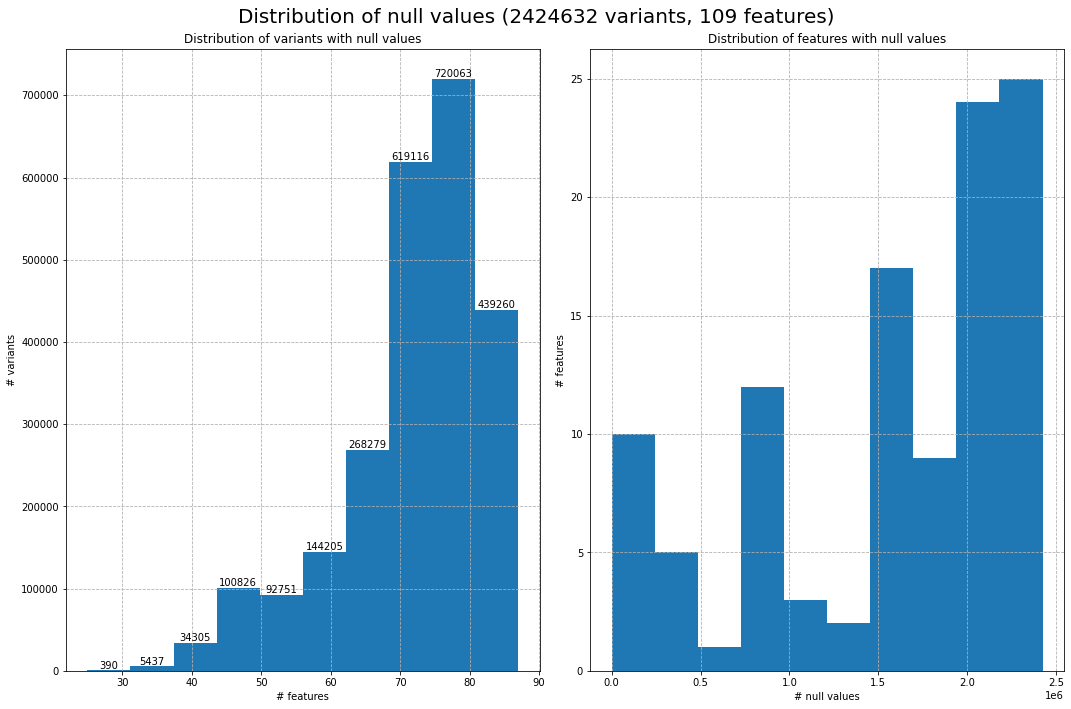

In [127]:
fig, [ax_var, ax_fts] = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle("Distribution of null values (2424632 variants, 109 features)", fontsize=20)

#fig, ax = plt.subplots(figsize=(9, 8))
ax_var.set_title("Distribution of variants with null values")
#ax.plot(50, y, '--')
ax_var.set_xlabel('# features')
ax_var.set_ylabel('# variants')
ax_var.grid(linestyle="--")
ax_var.hist(X_train.isnull().sum(axis = 1))

#fig, ax = plt.subplots(figsize=(9, 8))
ax_fts.set_title("Distribution of features with null values")
#ax.plot(50, y, '--')
ax_fts.set_xlabel('# null values')
ax_fts.set_ylabel('# features')
ax_fts.grid(linestyle="--")
ax_fts.hist(X_train.isnull().sum(axis = 0))

fig.tight_layout()
for container in ax_var.containers:
    ax_var.bar_label(container)
plt.show()


fig.tight_layout()
for container in ax_fts.containers:
    ax_fts.bar_label(container)
plt.show()

In [128]:
median_scores = X_train.median().to_dict()
median_scores

/scratch/local/ipykernel_217716/2279231684.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_scores = X_train.median().to_dict()


{'aloft.tolerant': 0.0289,
 'aloft.recessive': 0.5911249999999999,
 'aloft.dominant': 0.32145,
 'cadd_exome.phred': 10.11,
 'chasmplus.score': 0.074,
 'chasmplus.pval': 0.273,
 'civic.clinical_a_score': 4.0,
 'cosmic.variant_count': 1.0,
 'cosmic_gene.occurrences': 1394.0,
 'cscape.score': 0.5136155,
 'cancer_genome_interpreter.resistant': 0.0,
 'cancer_genome_interpreter.responsive': 1.0,
 'cancer_genome_interpreter.other': 0.0,
 'clinpred.score': 0.784,
 'dann.score': 0.6532157883887229,
 'dann_coding.dann_coding_score': 0.9945883491141246,
 'dgi.score': 3.79,
 'ess_gene.indispensability_score': 0.854403362556228,
 'exac_gene.exac_pli': 0.0506929591139338,
 'exac_gene.exac_pnull': 1.14435985995889e-05,
 'exac_gene.exac_del_score': 0.244988743340227,
 'exac_gene.exac_dup_score': 0.167670163013553,
 'exac_gene.exac_cnv_score': 0.105598885584888,
 'fathmm_xf_coding.fathmm_xf_coding_score': 0.4298729999999999,
 'funseq2.score': 0.634313422024004,
 'gerp.gerp_rs': 4.82,
 'ghis.ghis': 0.55

In [129]:
#Fill NAs in dataframe
X_train['gnomad3.af'] = X_train['gnomad3.af'].fillna(0)
X_train = X_train.fillna(X_train.median())

/scratch/local/ipykernel_217716/430676110.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train = X_train.fillna(X_train.median())


In [134]:
list(config_dict["dummies_sep"].keys())

['gtex.gtex_tissue',
 'dgi.interaction',
 'cgd.inheritance',
 'so',
 'repeat.repeatclass',
 'genehancer.feature_name',
 'cgc.inheritance',
 'cgc.class']

In [135]:
#Perform one-hot encoding using sep
for key in tqdm(config_dict["dummies_sep"]):
    X_train = pd.concat((X_train , X_train[key].str.get_dummies(sep = config_dict["dummies_sep"][key])), axis =1)

X_train.shape

100%|██████████| 8/8 [01:33<00:00, 11.64s/it]


(2424632, 232)

In [137]:
# Check how many columns are null
X_train.isnull().sum(axis = 0)

coding                                      797327
aloft.affect                               2409814
aloft.tolerant                                   0
aloft.recessive                                  0
aloft.dominant                                   0
aloft.pred                                 2409814
aloft.conf                                 2409814
cadd_exome.phred                                 0
cgd.inheritance                            1984674
chasmplus.score                                  0
chasmplus.pval                                   0
civic.clinical_a_score                           0
cosmic.variant_count                             0
cosmic_gene.occurrences                          0
cscape.score                                     0
cgc.class                                  1818825
cgc.inheritance                            1812634
cancer_genome_interpreter.resistant              0
cancer_genome_interpreter.responsive             0
cancer_genome_interpreter.other

In [138]:
X_train = X_train.drop(list(config_dict["dummies_sep"].keys()), axis=1)
X_train.shape

(2424632, 224)

In [139]:
#Perform one-hot encoding
X_train = pd.get_dummies(X_train, prefix_sep='_')
X_train.shape

(2424632, 245)

In [140]:
# Check how many columns are null
X_train.isnull().sum(axis = 0)

aloft.tolerant                                              0
aloft.recessive                                             0
aloft.dominant                                              0
cadd_exome.phred                                            0
chasmplus.score                                             0
chasmplus.pval                                              0
civic.clinical_a_score                                      0
cosmic.variant_count                                        0
cosmic_gene.occurrences                                     0
cscape.score                                                0
cancer_genome_interpreter.resistant                         0
cancer_genome_interpreter.responsive                        0
cancer_genome_interpreter.other                             0
clinpred.score                                              0
dann.score                                                  0
dann_coding.dann_coding_score                               0
dgi.scor

<AxesSubplot:>

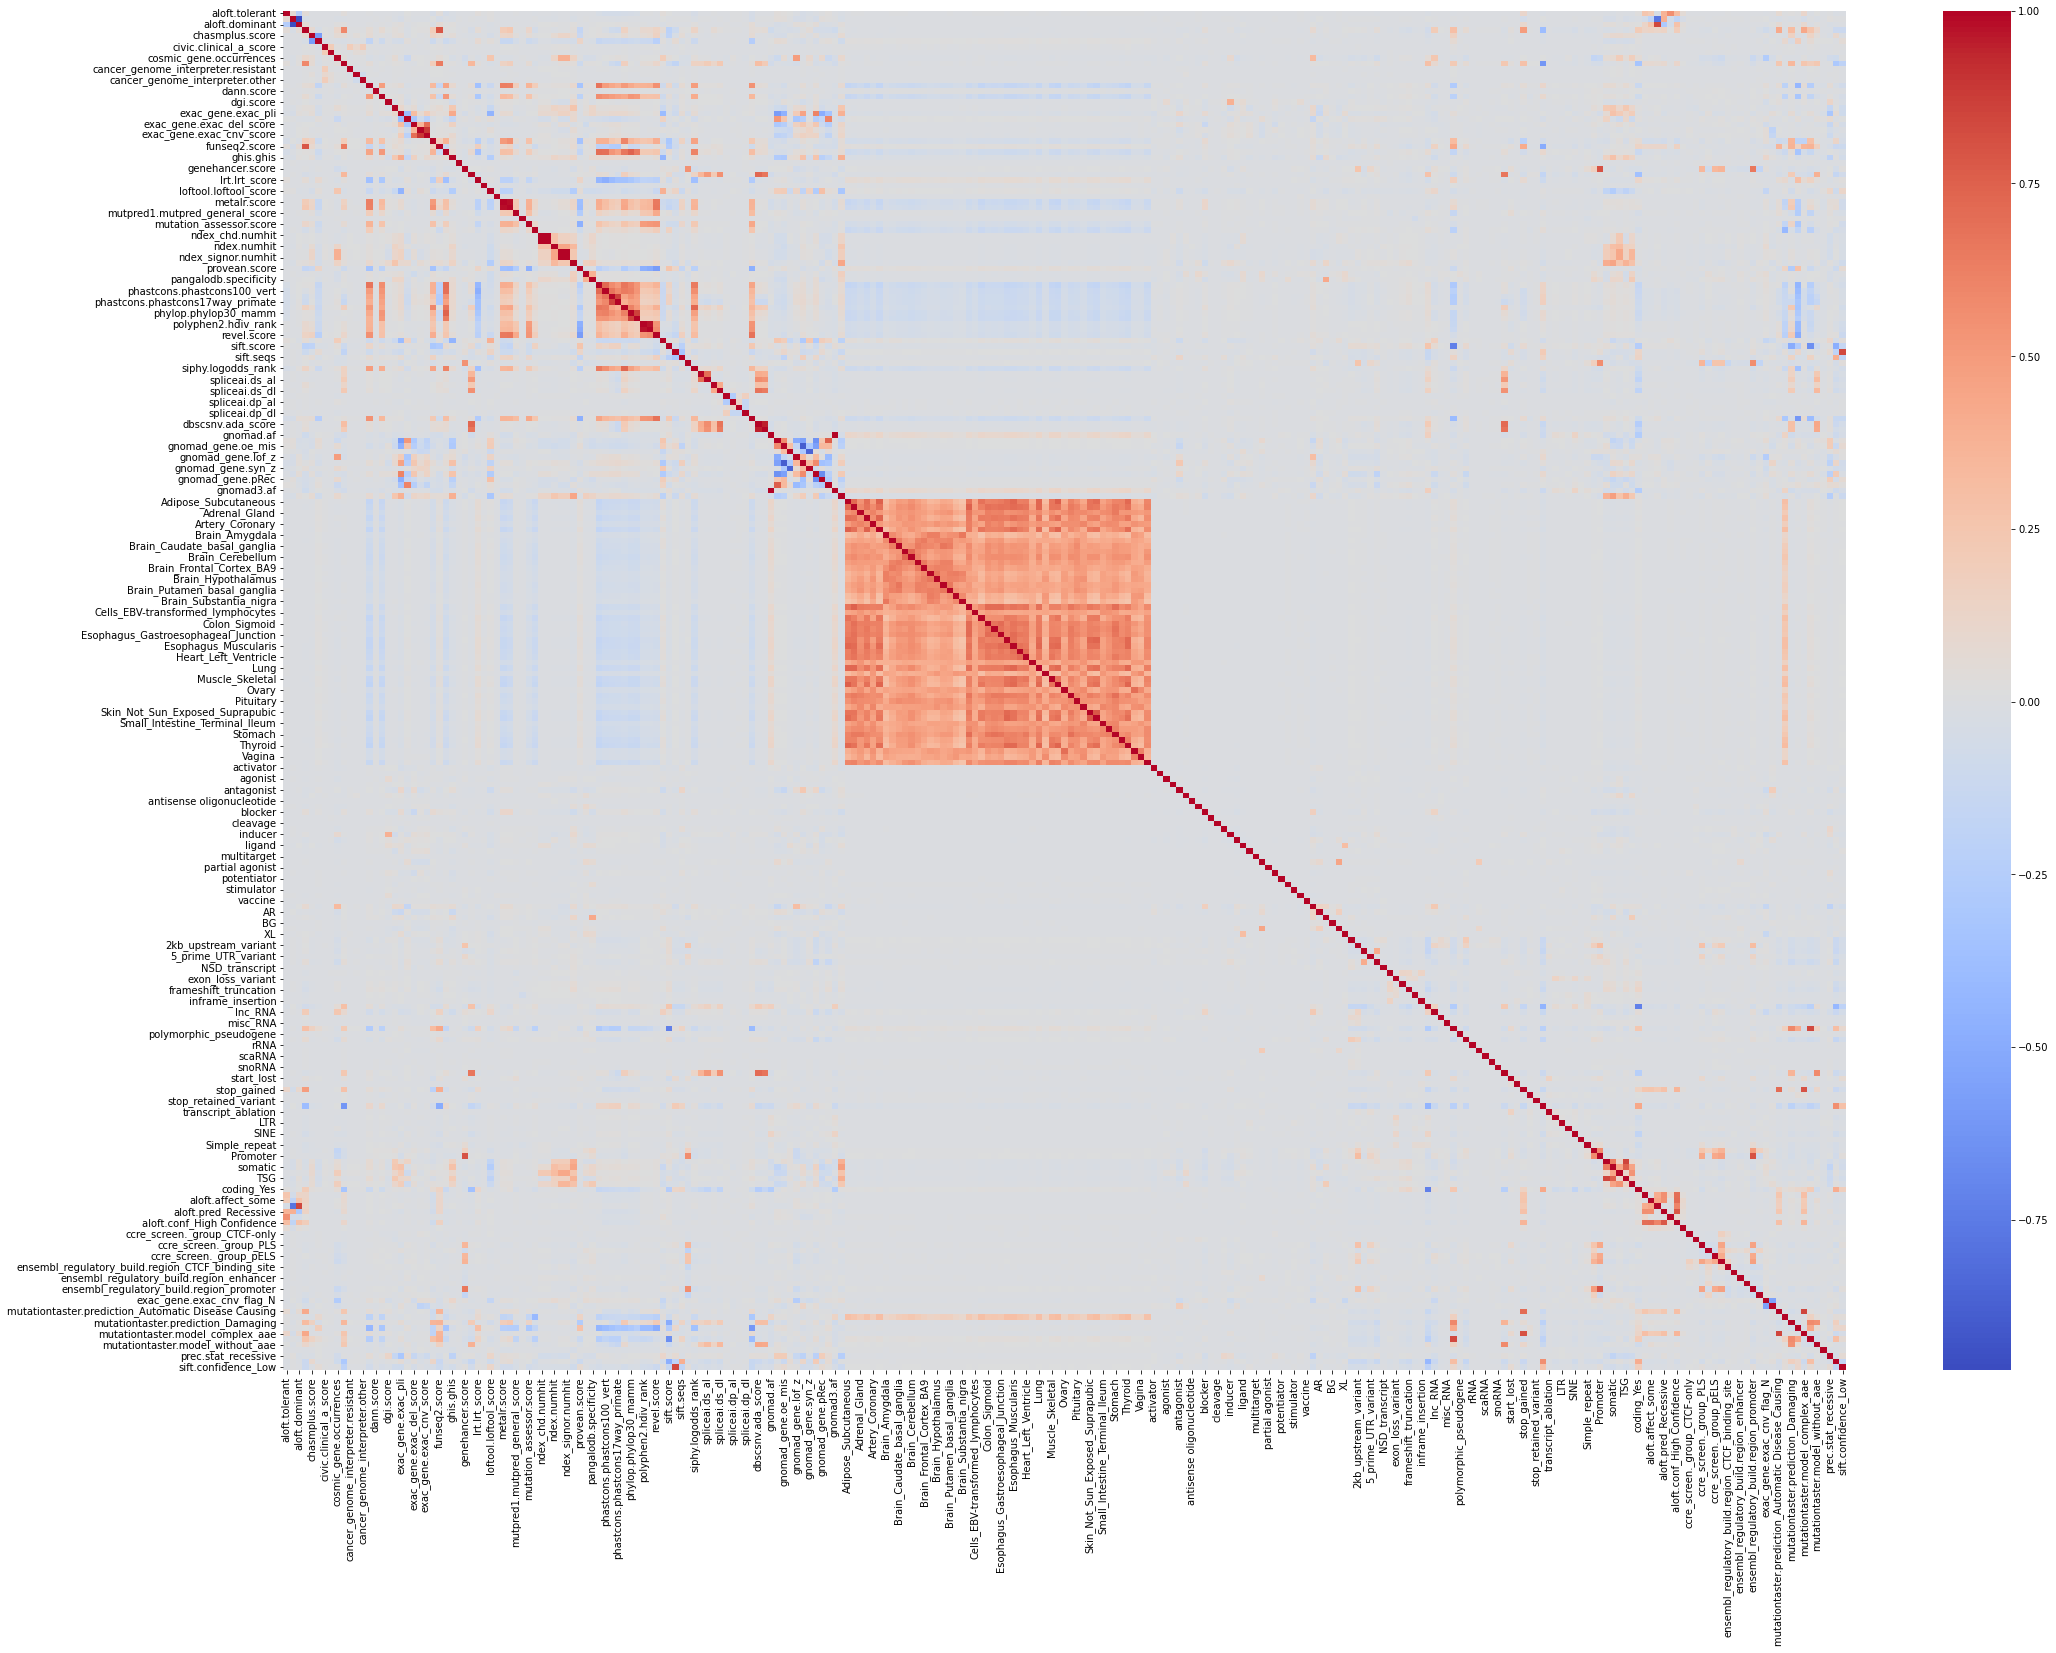

In [141]:
fig = plt.figure(figsize=(35, 25))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, fmt=".2g", cmap="coolwarm")

In [142]:
# Create correlation matrix
corr_matrix_abs = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix_abs.where(
            np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool)
        )



/scratch/local/ipykernel_217716/1278552867.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool)


In [143]:
# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(to_drop))
print(
            f"Correlated columns to be dropped: {to_drop}"
        )



8
Correlated columns to be dropped: ['aloft.dominant', 'metasvm.score', 'ndex_chd.numhit', 'ndex_chd.numhit', 'ndex_signor.numhit', 'ndex_signor.numhit', 'polyphen2.hvar_rank', 'gnomad3.af']


<AxesSubplot:>

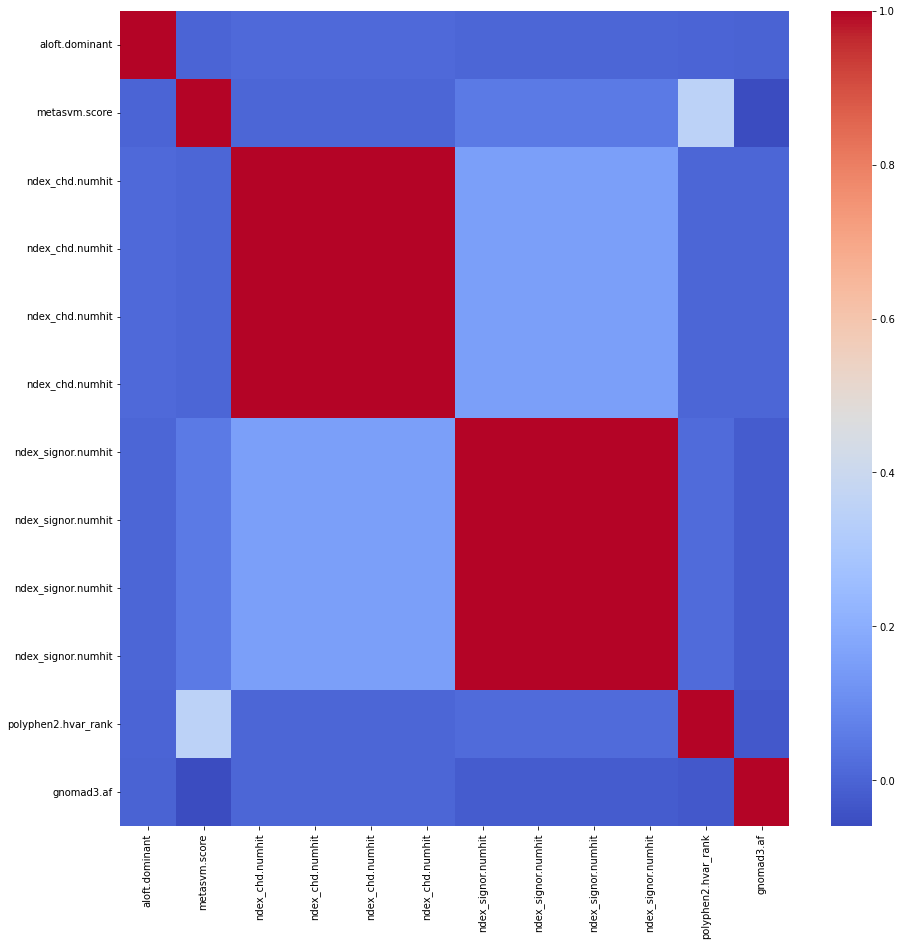

In [145]:
fig = plt.figure(figsize=(15, 15))
sns.heatmap(X_train[to_drop].corr(), fmt=".2g", cmap="coolwarm")

In [146]:
# Drop features
#df.drop(to_drop, axis=1, inplace=True)
X_train = X_train.reset_index(drop=True)
del corr_matrix, to_drop, upper, corr_matrix_abs

In [147]:
X_train.shape

(2424632, 245)

In [148]:
#fig = plt.figure(figsize=(30,20))
#sns.heatmap(X_train.corr(), fmt=".2g", cmap="coolwarm")

In [149]:
#Give variant IDs and add the variant info columns
#df = df.reset_index(drop=True)
#df['ID'] = [f'var_{num}' for num in range(len(df))]
#print('NAs filled!')
X_train = pd.concat([var.reset_index(drop=True), X_train.reset_index(drop=True)], axis=1)
del var

In [150]:
train_columns = X_train.columns.values.tolist()
print(train_columns)

['transcript', 'gene', 'consequence', 'protein_hgvs', 'cdna_hgvs', 'chrom', 'pos', 'ref_base', 'alt_base', 'clingen.disease', 'clingen.classification', 'clinvar.id', 'clinvar.rev_stat', 'clinvar.sig_conf', 'ncbigene.entrez', 'omim.omim_id', 'uniprot.acc', 'dbsnp.rsid', 'aloft.tolerant', 'aloft.recessive', 'aloft.dominant', 'cadd_exome.phred', 'chasmplus.score', 'chasmplus.pval', 'civic.clinical_a_score', 'cosmic.variant_count', 'cosmic_gene.occurrences', 'cscape.score', 'cancer_genome_interpreter.resistant', 'cancer_genome_interpreter.responsive', 'cancer_genome_interpreter.other', 'clinpred.score', 'dann.score', 'dann_coding.dann_coding_score', 'dgi.score', 'ess_gene.indispensability_score', 'exac_gene.exac_pli', 'exac_gene.exac_pnull', 'exac_gene.exac_del_score', 'exac_gene.exac_dup_score', 'exac_gene.exac_cnv_score', 'fathmm_xf_coding.fathmm_xf_coding_score', 'funseq2.score', 'gerp.gerp_rs', 'ghis.ghis', 'gwas_catalog.pval', 'genehancer.score', 'linsight.value', 'lrt.lrt_score', 'lr

In [151]:
print('\nData shape (After filtering) =', X_train.shape)
print('Class shape=', y_train.shape)


Data shape (After filtering) = (2424632, 263)
Class shape= (2424632,)


In [152]:
# Write it to a file
X_train.to_csv('../processed/train_data_80.csv.gz', index=False)
y_train.to_csv('../processed/train_data-y_80.csv.gz', index=False)

# Preparing Testing data

In [155]:
#print('\nclinvar_clnsig:\n', X_test['clinvar.sig'].value_counts())
print('\nclinvar_review:\n', X_test['clinvar.rev_stat'].value_counts())


clinvar_review:
 criteria provided, single submitter                     532435
criteria provided, multiple submitters, no conflicts    158658
no assertion criteria provided                           34160
reviewed by expert panel                                 16510
criteria provided, conflicting interpretations           15912
practice guideline                                          23
Name: clinvar.rev_stat, dtype: int64


In [156]:
print('\nImpact (Class):\n', y_test.value_counts())


Impact (Class):
 low_impact     547581
high_impact    210117
Name: class, dtype: int64


In [157]:
# Drop variant info columns so we can perform one-hot encoding
var = X_test[config_dict['id_cols']]
X_test = X_test.drop(config_dict['id_cols'], axis=1)

In [158]:
# Double check if there are any columns with weird formatting as categorical before performing one-hot encoding
num_cols = X_test._get_numeric_data().columns

list(set(X_test.columns) - set(num_cols))

['aloft.pred',
 'gtex.gtex_tissue',
 'ccre_screen._group',
 'sift.confidence',
 'aloft.affect',
 'prec.stat',
 'exac_gene.exac_cnv_flag',
 'ensembl_regulatory_build.region',
 'dgi.interaction',
 'mutationtaster.model',
 'ccre_screen.bound',
 'coding',
 'cgd.inheritance',
 'aloft.conf',
 'so',
 'repeat.repeatclass',
 'mutationtaster.prediction',
 'genehancer.feature_name',
 'cgc.inheritance',
 'cgc.class']

In [159]:
X_test.shape

(757698, 108)

In [160]:
#Perform one-hot encoding
for key in tqdm(config_dict["dummies_sep"]):
    X_test = pd.concat((X_test , X_test[key].str.get_dummies(sep = config_dict["dummies_sep"][key])), axis =1)
X_test = X_test.drop(list(config_dict["dummies_sep"].keys()), axis=1)
X_test = pd.get_dummies(X_test, prefix_sep='_')
X_test.shape

100%|██████████| 8/8 [00:32<00:00,  4.01s/it]


(757698, 242)

In [161]:
X_test['gnomad3.af'] = X_test['gnomad3.af'].fillna(0)

In [162]:
for key in tqdm(median_scores.keys()):
            if key in X_test.columns:
                X_test[key] = (
                    X_test[key]
                    .fillna(median_scores[key])
                    .astype("float64")
                )

100%|██████████| 86/86 [00:53<00:00,  1.60it/s]


In [164]:
X_test.columns

Index(['aloft.tolerant', 'aloft.recessive', 'aloft.dominant',
       'cadd_exome.phred', 'chasmplus.score', 'chasmplus.pval',
       'civic.clinical_a_score', 'cosmic.variant_count',
       'cosmic_gene.occurrences', 'cscape.score',
       ...
       'mutationtaster.prediction_Automatic Polymorphism',
       'mutationtaster.prediction_Damaging',
       'mutationtaster.prediction_Polymorphism',
       'mutationtaster.model_complex_aae', 'mutationtaster.model_simple_aae',
       'mutationtaster.model_without_aae', 'prec.stat_lof-tolerant',
       'prec.stat_recessive', 'sift.confidence_High', 'sift.confidence_Low'],
      dtype='object', length=242)

In [165]:
#df2 = pd.DataFrame()
for key in tqdm(train_columns):
            if key in X_test.columns:
                pass
            else:
                X_test[key] = 0

100%|██████████| 263/263 [00:00<00:00, 5427.02it/s]


In [168]:
print('\nData shape =', X_test.shape)


Data shape = (757698, 263)


In [169]:
# Check how many columns are null
X_test.isnull().sum(axis = 0)

aloft.tolerant                                              0
aloft.recessive                                             0
aloft.dominant                                              0
cadd_exome.phred                                            0
chasmplus.score                                             0
chasmplus.pval                                              0
civic.clinical_a_score                                      0
cosmic.variant_count                                        0
cosmic_gene.occurrences                                     0
cscape.score                                                0
cancer_genome_interpreter.resistant                         0
cancer_genome_interpreter.responsive                        0
cancer_genome_interpreter.other                             0
clinpred.score                                              0
dann.score                                                  0
dann_coding.dann_coding_score                               0
dgi.scor

In [170]:
X_test = X_test.drop(config_dict['id_cols'], axis=1)

In [171]:
print('\nData shape =', X_test.shape)


Data shape = (757698, 245)


In [172]:
X_test.shape[0] == var.shape[0]

True

In [173]:
X_test = pd.concat([var.reset_index(drop=True), X_test.reset_index(drop=True)], axis=1)

In [174]:
# Check how many columns are null
X_test.isnull().sum(axis = 0)

transcript                                                       0
gene                                                             0
consequence                                                      0
protein_hgvs                                                383413
cdna_hgvs                                                    82191
chrom                                                            0
pos                                                              0
ref_base                                                         0
alt_base                                                         0
clingen.disease                                             432322
clingen.classification                                      432322
clinvar.id                                                       0
clinvar.rev_stat                                                 0
clinvar.sig_conf                                            741563
ncbigene.entrez                                               

In [175]:
print('\nData shape =', X_test.shape)
print('\nClass shape =', y_test.shape)


Data shape = (757698, 263)

Class shape = (757698,)


In [176]:
# Write it to a file
X_test.to_csv('../processed/test_data_20.csv.gz', index=False)
y_test.to_csv('../processed/test_data-y_20.csv.gz', index=False)

### Preparing Validation data

In [177]:
# Drop variant info columns so we can perform one-hot encoding
var = X_val[config_dict['id_cols']]
X_val = X_val.drop(config_dict['id_cols'], axis=1)

In [178]:
#Perform one-hot encoding
for key in tqdm(config_dict["dummies_sep"]):
    X_val = pd.concat((X_val , X_val[key].str.get_dummies(sep = config_dict["dummies_sep"][key])), axis =1)
X_val = X_val.drop(list(config_dict["dummies_sep"].keys()), axis=1)
X_val = pd.get_dummies(X_val, prefix_sep='_')
X_val.shape

100%|██████████| 8/8 [00:24<00:00,  3.04s/it]


(606158, 242)

In [179]:
X_val['gnomad3.af'] = X_val['gnomad3.af'].fillna(0)

In [180]:
for key in tqdm(median_scores.keys()):
            if key in X_val.columns:
                X_val[key] = (
                    X_val[key]
                    .fillna(median_scores[key])
                    .astype("float64")
                )

100%|██████████| 86/86 [00:41<00:00,  2.09it/s]


In [181]:
for key in tqdm(train_columns):
            if key in X_val.columns:
                pass
            else:
                X_val[key] = 0

print('\nData shape =', X_val.shape)

100%|██████████| 263/263 [00:00<00:00, 13062.19it/s]


Data shape = (606158, 263)


In [182]:
# Check how many columns are null
X_val.isnull().sum(axis = 0)

aloft.tolerant                                              0
aloft.recessive                                             0
aloft.dominant                                              0
cadd_exome.phred                                            0
chasmplus.score                                             0
chasmplus.pval                                              0
civic.clinical_a_score                                      0
cosmic.variant_count                                        0
cosmic_gene.occurrences                                     0
cscape.score                                                0
cancer_genome_interpreter.resistant                         0
cancer_genome_interpreter.responsive                        0
cancer_genome_interpreter.other                             0
clinpred.score                                              0
dann.score                                                  0
dann_coding.dann_coding_score                               0
dgi.scor

In [184]:
X_val = X_val.drop(config_dict['id_cols'], axis=1)
print('\nData shape =', X_test.shape)

KeyError: "['transcript' 'gene' 'consequence' 'protein_hgvs' 'cdna_hgvs' 'chrom'\n 'pos' 'ref_base' 'alt_base' 'clingen.disease' 'clingen.classification'\n 'clinvar.id' 'clinvar.rev_stat' 'clinvar.sig_conf' 'ncbigene.entrez'\n 'omim.omim_id' 'uniprot.acc' 'dbsnp.rsid'] not found in axis"

In [185]:
X_val = pd.concat([var.reset_index(drop=True), X_val.reset_index(drop=True)], axis=1)
print('\nData shape =', X_val.shape)
print('\nClass shape =', y_val.shape)


Data shape = (606158, 263)

Class shape = (606158,)


In [186]:
# Write it to a file
X_val.to_csv('../processed/val_data_20.csv.gz', index=False)
y_val.to_csv('../processed/val_data-y_20.csv.gz', index=False)

In [187]:
del X_train, X_test, X_val, df

In [188]:
df = original

In [190]:
benchmark_columns = ['chrom','pos','ref_base','alt_base','transcript','cadd_exome.phred','cscape.score','clinpred.score','dann.score','dann_coding.dann_coding_score','dgi.score','fathmm_xf_coding.fathmm_xf_coding_score','funseq2.score','linsight.value','lrt.lrt_score','loftool.loftool_score','metasvm.score','metalr.score','mutpred1.mutpred_general_score','mutpred_indel.score','mutation_assessor.score','mutationtaster.score','provean.score','phdsnpg.score','revel.score','sift.score','vest.score','dbscsnv.ada_score','dbscsnv.rf_score','clinvar.sig']
benchmark_df = df[benchmark_columns]
benchmark_df.columns = ['chrom','pos','ref_base','alt_base','transcript','CADD','Cscape','Clinpred','DANN','DANN_coding','DGI','fathmm_xf','funseq2','linsight','LRT','loftool','MetaSVM','MetaLR','Mutpred','Mutpred_indel','Mutation_assessor','Mutationtaster','Provean','phdsnpg','revel','SIFT','VEST','dbscsnv.ada_score','dbscsnv.rf_score','Clinvar']
benchmark_df.head()

,chrom,pos,ref_base,alt_base,transcript,CADD,Cscape,Clinpred,DANN,DANN_coding,...,Mutation_assessor,Mutationtaster,Provean,phdsnpg,revel,SIFT,VEST,dbscsnv.ada_score,dbscsnv.rf_score,Clinvar
0,chr1,69134,A,G,ENST00000335137,16.91,0.480042,0.004,0.957771,0.957771,...,1.54,0.998383,-3.56,0.133,0.075,0.107,0.107,NaN,NaN,NaN
1,chr1,69134,A,G,ENST00000641515,16.91,0.480042,0.004,0.957771,0.957771,...,NaN,0.998383,NaN,0.133,0.075,NaN,NaN,NaN,NaN,NaN
2,chr1,69581,C,G,ENST00000335137,23.40,0.279863,0.998,0.996460,0.996460,...,3.13,0.992433,-8.33,0.698,0.079,0.000,0.431,NaN,NaN,NaN
3,chr1,69581,C,G,ENST00000641515,23.40,0.279863,0.998,0.996460,0.996460,...,NaN,0.992433,NaN,0.698,0.079,NaN,NaN,NaN,NaN,NaN
4,chr1,69682,G,A,ENST00000335137,20.80,0.329402,0.161,0.996149,0.996149,...,0.84,1.000000,0.13,0.025,0.112,0.186,0.073,NaN,NaN,NaN


In [191]:
benchmark_df.shape

(10460446, 30)

In [192]:
# Write it to a file
benchmark_df.to_csv('../processed/benchmark_data.csv.gz', index=False)

In [193]:
original.so.head()

0    missense_variant
1    missense_variant
2    missense_variant
3    missense_variant
4    missense_variant
Name: so, dtype: object

In [194]:
def test_parsing(dataframe, config_dict):
    # Drop variant info columns so we can perform one-hot encoding
    var = dataframe[config_dict['id_cols']]
    dataframe = dataframe.drop(config_dict['id_cols'], axis=1)
    #dataframe = dataframe.replace(['.','-'], np.nan)
    
    #Perform one-hot encoding
    for key in tqdm(config_dict["dummies_sep"]):
        dataframe = pd.concat((dataframe , dataframe[key].str.get_dummies(sep = config_dict["dummies_sep"][key])), axis =1)
    dataframe = dataframe.drop(list(config_dict["dummies_sep"].keys()), axis=1)
    dataframe = pd.get_dummies(dataframe, prefix_sep='_')
    
    for key in tqdm(list(config_dict['median_scores'].keys())):
            if key in dataframe.columns:
                dataframe[key] = (
                    dataframe[key]
                    .fillna(config_dict['median_scores'][key])
                    .astype("float64")
                )
                
    
    for key in tqdm(config_dict["filtered_cols"]):
            if key in dataframe.columns:
                pass
            else:
                dataframe[key] = 0
    
              
    dataframe = dataframe.drop(config_dict['id_cols'], axis=1)
    dataframe = pd.concat([var.reset_index(drop=True), dataframe.reset_index(drop=True)], axis=1)
    return dataframe


In [ ]:
df2 = test_parsing(original, config_dict)
print('\nData shape =', df2.shape)
# Write it to a file
df2.to_csv('../processed/clinvar_filtered.csv.gz', index=False)

 38%|███▊      | 3/8 [02:37<03:54, 46.97s/it]